### Load library and Data

In [2]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(devtools))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(msigdbr))
suppressPackageStartupMessages(library(UpSetR))
suppressPackageStartupMessages(library(ComplexHeatmap))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(org.Mm.eg.db))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(EnhancedVolcano))
suppressPackageStartupMessages(library(tools))
suppressPackageStartupMessages(library(stringr))
suppressPackageStartupMessages(library(knitr))
suppressPackageStartupMessages(library(khroma))
suppressPackageStartupMessages(library(scales))
suppressPackageStartupMessages(library(gridtext))
suppressPackageStartupMessages(library(ggraph))
suppressPackageStartupMessages(library(igraph))

In [3]:
load("SeuratData_DEGs.RData")
ilcpaths <- read.csv('String_ILCs_deg1_deg2_deg3_selected.csv')
ilc1 <- ilcpaths %>% filter(ilc == 'ilc1')
ilc2 <- ilcpaths %>% filter(ilc == 'ilc2')
ilc3 <- ilcpaths %>% filter(ilc == 'ilc3')
volgenes <- read.csv('Volcano_genes.csv')

### Format parameters

In [4]:
ilc_dot_cols <- setNames(c('#6f6866', color('medium contrast')(3) %>% as.character),  c('ilc1','ilc2','ilc3'))
bar_width = 0.8
common_theme <- theme(
    axis.text.y = element_text(size = 11, color = 'black', face = 'bold'),
    axis.title = element_text(size = 11, color = 'black', face = 'bold'),
    plot.margin = unit(c(1, 1, 1, 1), "cm"),
    aspect.ratio = 1, 
    legend.position = "top",  legend.text = element_text(angle = 30, hjust = 1) ) 

### Figure F. Barplot of pathways enriched in ILC1

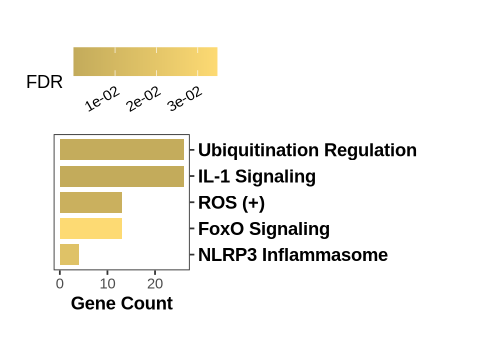

In [5]:
options(repr.plot.width = 4, repr.plot.height = 3)
g1 <-  ggplot(ilc1, aes(x = reorder(term.description, gene_count), y = gene_count, fill = FDR)) +
             geom_bar(stat = "identity", position = "dodge", width = bar_width) + 
             scale_fill_gradient(high = '#fdda73', low = '#C3AB5B', labels = label_scientific(digits = 3)) + 
             theme_test() + common_theme + coord_flip() + ylab('Gene Count') + xlab(NULL) +
             scale_y_continuous(position = "left", labels = abs) + scale_x_discrete(position = "top") 

g1

### Figure G. Volcano plot of DEGs in ILC1

[1] "Isg15"    "Psmb8"    "Romo1"    "Pycard"   "Nfkbia"   "Park7"   
 [7] "Rbx1"     "Foxo3"    "Txn1"     "Cyba"     "Hsp90ab1" "Bcl2l11" 
[13] "Foxo1"    "Irak2"

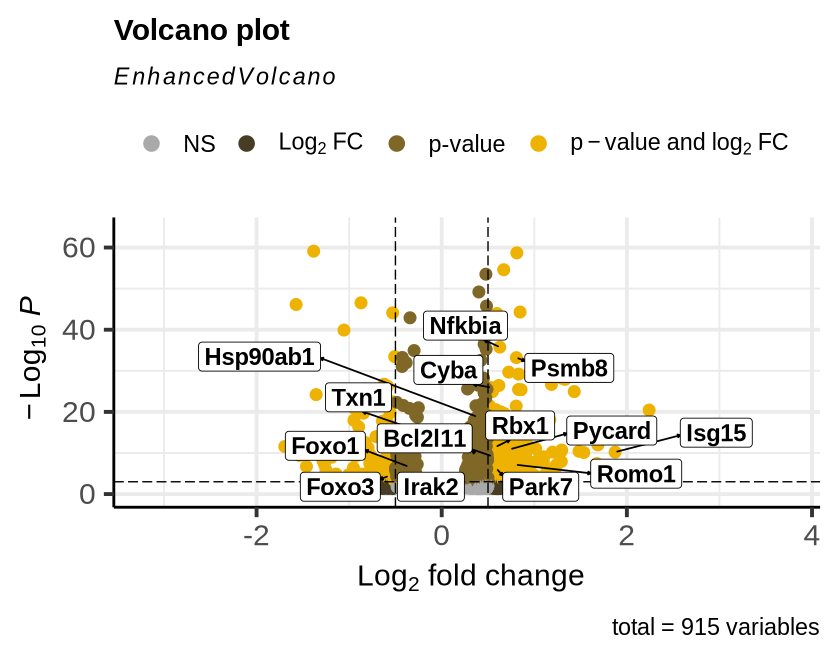

In [6]:
deg2plot <- deg1
pathway_genes <- volgenes %>% filter(ilc == 1) %>% pull(gene)
deg2hilight <- deg2plot %>% filter(gene_symbol %in% pathway_genes) %>% pull(gene_symbol) %>% unique
deg2hilight

options(repr.plot.width = 7, repr.plot.height =  5.5)
EnhancedVolcano(deg2plot,
    lab = deg2plot$gene_symbol,
    x = 'avg_log2FC',
    y = 'p_val_adj',
    selectLab = deg2hilight,
    xlab = bquote(~Log[2]~ 'fold change'),
    pCutoff = 0.001, 
    FCcutoff = 0.5,
    pointSize = 3.0,
    labSize = 5.0,
    labCol = 'black',
    labFace = 'bold',
    boxedLabels = TRUE,
    colAlpha = 1,
    legendPosition = 'top',
    legendLabSize = 14,
    legendIconSize = 4.0,
    drawConnectors = TRUE,
    widthConnectors = 0.5,
    colConnectors = 'black', 
    max.overlaps = Inf,
    col = c('darkgrey','#463D24','#7F6827','#eeb203')) 

### Figure H. Barplot of pathways enriched in ILC2

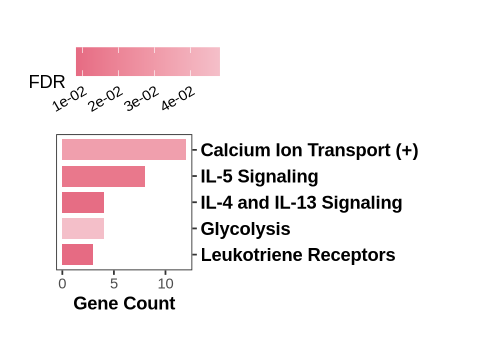

In [7]:
options(repr.plot.width = 4, repr.plot.height = 3)
g2 <-  ggplot(ilc2, aes(x = reorder(term.description, gene_count), y = gene_count, fill = FDR)) +
             geom_bar(stat = "identity", position = "dodge", width = bar_width) + 
             scale_fill_gradient(high = '#F4BFC9', low = '#E66B83', labels = label_scientific(digits = 3)) + 
             theme_test() + common_theme + coord_flip() + ylab('Gene Count') + xlab(NULL) +
             scale_y_continuous(position = "left", labels = abs, breaks = seq(0, max(ilc2$gene_count), by = 5)) + scale_x_discrete(position = "top") 
g2

### Figure I. Volcano plot of DEGs in ILC2

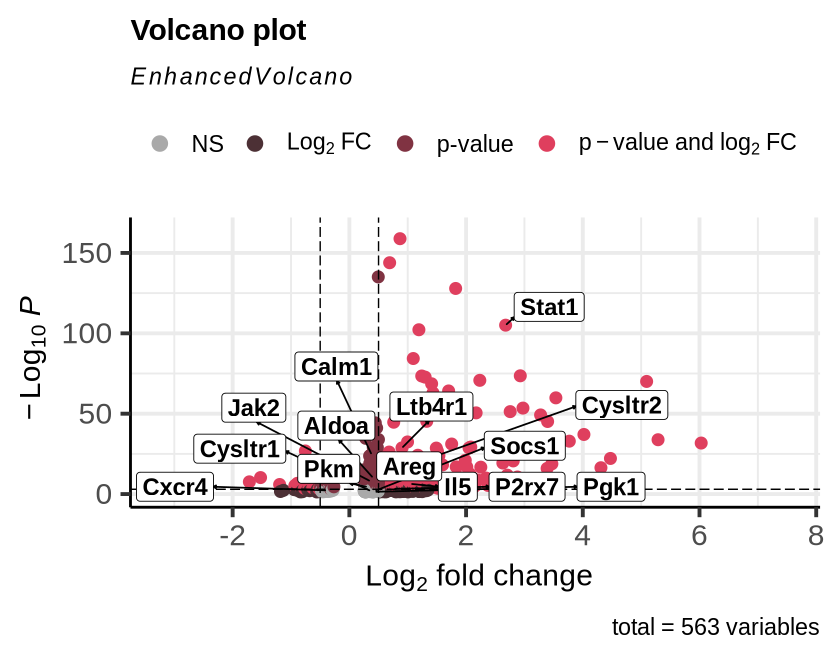

In [8]:
deg2plot <- deg2
pathway_genes <- volgenes %>% filter(ilc == 2) %>% pull(gene)
deg2hilight <- deg2plot %>% filter(gene_symbol %in% pathway_genes) %>% pull(gene_symbol) %>% unique
deg2hilight <- c(deg2hilight, 'Areg','Il5','Il9','Calca','Cxcl3','Cxcl1')

options(repr.plot.width = 7, repr.plot.height =  5.5)
EnhancedVolcano(deg2plot,
    lab = deg2plot$gene_symbol,
    x = 'avg_log2FC',
    y = 'p_val_adj',
    selectLab = deg2hilight,
    xlab = bquote(~Log[2]~ 'fold change'),
    pCutoff = 0.001, 
    FCcutoff = 0.5,
    pointSize = 3.0,
    labSize = 5.0,
    labCol = 'black',
    labFace = 'bold',
    boxedLabels = TRUE,
    colAlpha = 1,
    legendPosition = 'top',
    legendLabSize = 14,
    legendIconSize = 4.0,
    drawConnectors = TRUE,
    widthConnectors = 0.5,
    colConnectors = 'black', 
    max.overlaps = Inf,
    col = c('darkgrey','#4C3035','#803342','#df3f5e')) 

### Figure J. Barplot of pathways enriched in ILC3

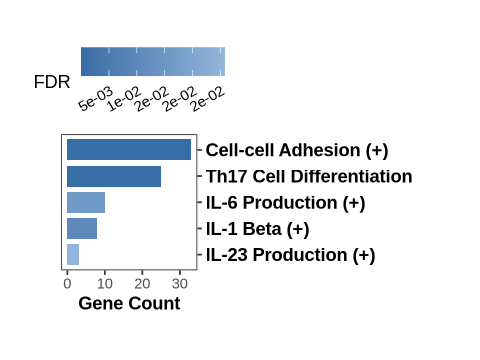

In [9]:
options(repr.plot.width = 4, repr.plot.height = 3)
g3 <-  ggplot(ilc3, aes(x = reorder(term.description, gene_count), y = gene_count, fill = FDR)) +
             geom_bar(stat = "identity", position = "dodge", width = bar_width) + 
             scale_fill_gradient(high = '#92B6DB', low = '#376DA4', labels = label_scientific(digits = 1)) +              
             theme_test() + common_theme + coord_flip() + ylab('Gene Count') + xlab(NULL) +
             scale_y_continuous(position = "left", labels = abs) + scale_x_discrete(position = "top") 
g3

### Figure K. Volcano plot of DEGs in ILC3

[1] "Il12rb1" "Rorc"    "Ifng"    "Cd274"   "Icam1"   "Il17a"   "Plcg2"  
[8] "Stat3"   "Hmgb1"

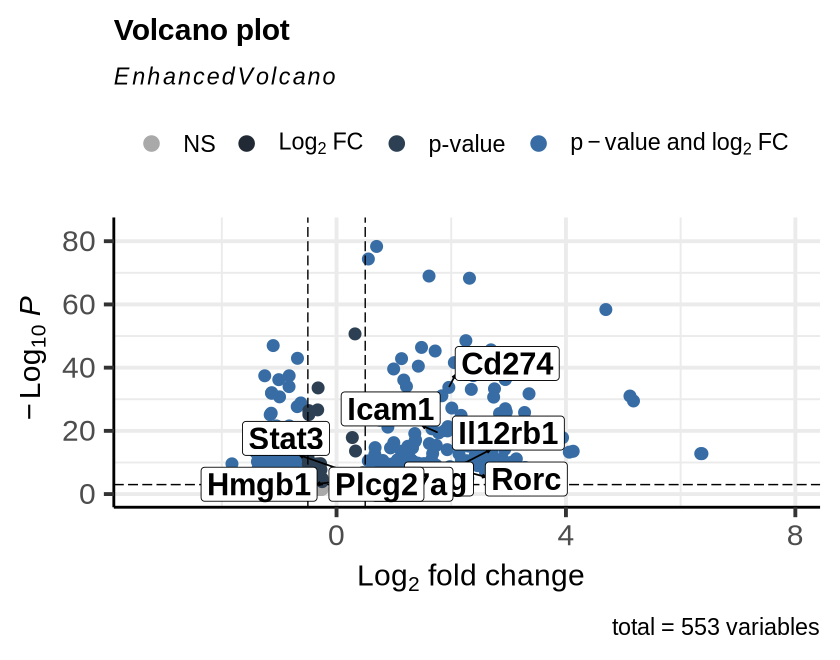

In [11]:
deg2plot <- deg3
pathway_genes <- volgenes %>% filter(ilc == 3) %>% pull(gene)
deg2hilight <- deg2plot %>% filter(gene_symbol %in% pathway_genes) %>% pull(gene_symbol) %>% unique
deg2hilight

options(repr.plot.width = 7, repr.plot.height = 5.5)
EnhancedVolcano(deg2plot,
    lab = deg2plot$gene_symbol,
    x = 'avg_log2FC',
    y = 'p_val_adj',
    selectLab = deg2hilight,
    xlab = bquote(~Log[2]~ 'fold change'),
    pCutoff = 0.001, 
    FCcutoff = 0.5,
    pointSize = 3.0,
    labSize = 6.5,
    labCol = 'black',
    labFace = 'bold',
    boxedLabels = TRUE,
    colAlpha = 1,
    legendPosition = 'top',
    legendLabSize = 14,
    legendIconSize = 4.0,
    drawConnectors = TRUE,
    widthConnectors = 0.5,
    colConnectors = 'black', 
    max.overlaps = 60,
    col = c('darkgrey','#212A34','#2C3F53','#376da4')) 